In [15]:
# import basic modules
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import datetime
from nltk.corpus import stopwords
import pickle
import dill

# import specialised modules
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score

# import training functions
from ipynb.fs.defs.training import create_x
from ipynb.fs.defs.training import create_x2
from ipynb.fs.defs.training import create_x3

In [3]:
# get data
with open("../data/testing_data", "rb") as fb:
    testing_data = pickle.load(fb)

In [4]:
# get models
with open("models", "rb") as fb:
    models = dill.load(fb)

c:\Users\Ethan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:288: UserWarning: Trying to unpickle estimator LinearRegression from version 1.0.2 when using version 1.2.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [5]:
with open("../data/good_words_text", "rb") as fb:
    words_text = dill.load(fb)

with open("../data/good_words_title", "rb") as fb:
    words_title = dill.load(fb)

In [6]:
def get_predictions(model, inputs):
    output = []
    for i in inputs:
        output.append(model.predict([i]))
    return output

In [20]:
def evaluate_model_regression(model, x_fun, inputs, words, labels):
    predictions = get_predictions(model, x_fun(inputs, words))
    output_metrics = []
    output_metrics.append(metrics.mean_absolute_error(labels, predictions))
    output_metrics.append(metrics.mean_squared_error(labels, predictions))
    return (predictions, output_metrics)

In [21]:
def evaluate_model_classification(model, x_fun, inputs, words, labels):
    predictions = [1 if x >= 20 else 0 for x in get_predictions(model, x_fun(inputs, words))]
    output_metrics = []
    output_metrics.append(metrics.mean_absolute_error(labels, predictions))
    output_metrics.append(metrics.mean_squared_error(labels, predictions))
    output_metrics.append(metrics.accuracy_score(labels, predictions))
    return (predictions, output_metrics)

In [27]:
labels_reg = list(testing_data.loc[testing_data.type == "story"].score.fillna(0))
labels_bin = [1 if x >= 20 else 0 for x in labels_reg]

In [9]:
# get evaluation metrics of classification models
out1 = evaluate_model_classification(models[0], create_x, testing_data.loc[testing_data.type == "story"], words_text, labels_bin)
out2 = evaluate_model_classification(models[1], create_x2, testing_data.loc[testing_data.type == "story"], words_text, labels_bin)
out3 = evaluate_model_classification(models[2], create_x3, testing_data.loc[testing_data.type == "story"], words_title, labels_bin)
print(out1[1])
print(out2[1])
print(out3[1])

[0.08384966366225362, 0.08384966366225362, 0.9161503363377463]
[0.08384966366225362, 0.08384966366225362, 0.9161503363377463]
[0.08384966366225362, 0.08384966366225362, 0.9161503363377463]


In [29]:
# get evaluation metrics of regression models
regression_output1 = evaluate_model_regression(models[0], create_x, testing_data.loc[testing_data.type == "story"], words_text, labels_reg)
regression_output2 = evaluate_model_regression(models[1], create_x2, testing_data.loc[testing_data.type == "story"], words_text, labels_reg)
regression_output3 = evaluate_model_regression(models[2], create_x3, testing_data.loc[testing_data.type == "story"], words_title, labels_reg)
print(regression_output1[1])
print(regression_output2[1])
print(regression_output3[1])

[14.833926808649483, 1889.1345268577934]
[14.769165869559027, 1886.9725831570834]
[14.802496984959266, 1887.7263042674647]


In [37]:
regression_output1_vals = [x[0] for x in regression_output1[0]]
regression_output2_vals = [x[0] for x in regression_output2[0]]
regression_output3_vals = [x[0] for x in regression_output3[0]]

In [16]:
# define confusion matrix for models
classification_conf1 = confusion_matrix(labels_bin, out1[0])
classification_conf2 = confusion_matrix(labels_bin, out2[0])
classification_conf3 = confusion_matrix(labels_bin, out3[0])

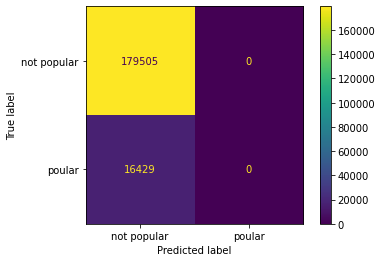

In [17]:
# plot confusion matrix for first model
display = metrics.ConfusionMatrixDisplay(confusion_matrix=conf1, display_labels=["not popular", "poular"])
display.plot()
plt.show()

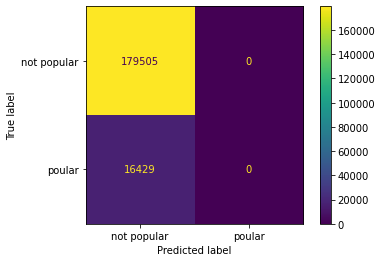

In [18]:
# plot confusion matrix for second model
display = metrics.ConfusionMatrixDisplay(confusion_matrix=conf2, display_labels=["not popular", "poular"])
display.plot()
plt.show()

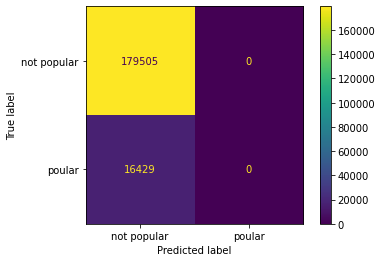

In [19]:
# plot confusion matrix for third model
display = metrics.ConfusionMatrixDisplay(confusion_matrix=conf3, display_labels=["not popular", "poular"])
display.plot()
plt.show()

In [44]:
def plot_predictions(predictions, labels):

    #define plot size
    plt.figure(figsize = (20, 5))

    # plot labels and predictions
   
    ax = [np.log(labels), np.log(predictions)]

    plt.boxplot(ax, vert = False)
    plt.yticks([1,2], ["labels", "predictions"])
    plt.xlabel("Score")

    # show graph 
    plt.show()

C:\Users\Ethan\AppData\Local\Temp\ipykernel_16116\883297131.py:8: RuntimeWarning: divide by zero encountered in log
  ax = [np.log(labels), np.log(predictions)]
C:\Users\Ethan\AppData\Local\Temp\ipykernel_16116\883297131.py:8: RuntimeWarning: invalid value encountered in log
  ax = [np.log(labels), np.log(predictions)]


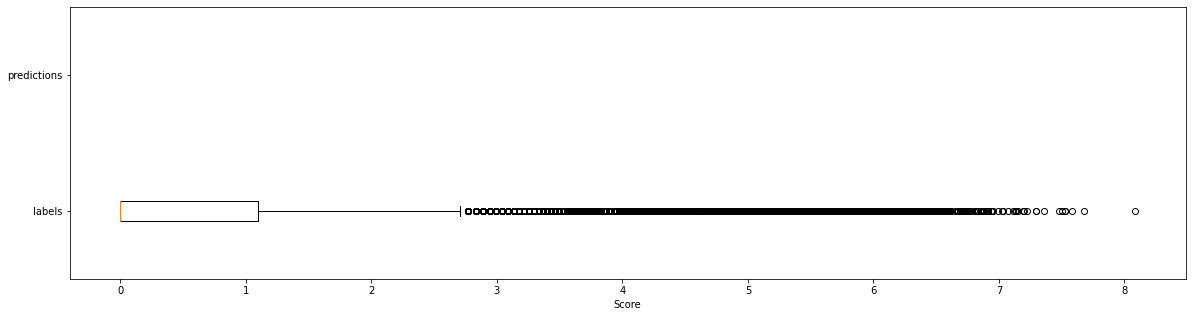

C:\Users\Ethan\AppData\Local\Temp\ipykernel_16116\883297131.py:8: RuntimeWarning: divide by zero encountered in log
  ax = [np.log(labels), np.log(predictions)]
C:\Users\Ethan\AppData\Local\Temp\ipykernel_16116\883297131.py:8: RuntimeWarning: invalid value encountered in log
  ax = [np.log(labels), np.log(predictions)]


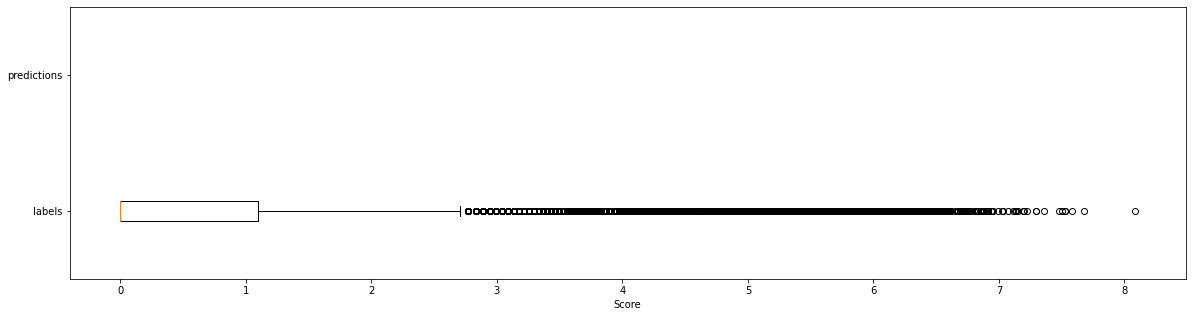

C:\Users\Ethan\AppData\Local\Temp\ipykernel_16116\883297131.py:8: RuntimeWarning: divide by zero encountered in log
  ax = [np.log(labels), np.log(predictions)]
C:\Users\Ethan\AppData\Local\Temp\ipykernel_16116\883297131.py:8: RuntimeWarning: invalid value encountered in log
  ax = [np.log(labels), np.log(predictions)]


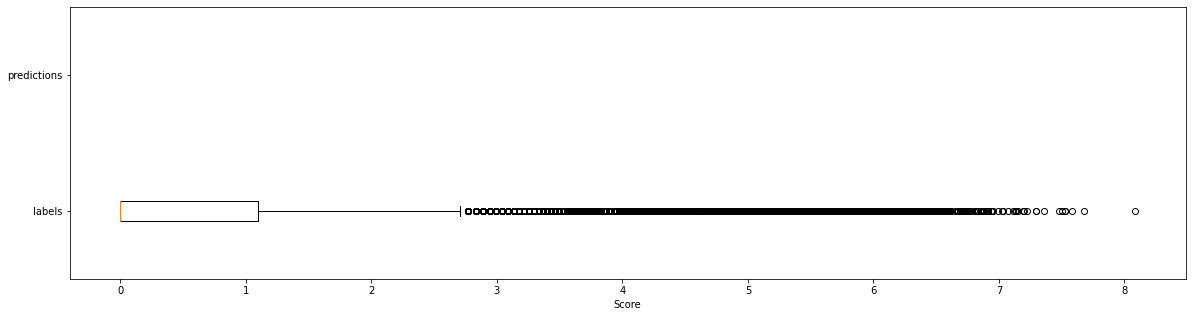

In [45]:
plot_predictions(regression_output1_vals, labels_reg)
plot_predictions(regression_output2_vals, labels_reg)
plot_predictions(regression_output1_vals, labels_reg)

In [46]:
print(regression_output1[1])
print(regression_output2[1])
print(regression_output3[1])

[14.833926808649483, 1889.1345268577934]
[14.769165869559027, 1886.9725831570834]
[14.802496984959266, 1887.7263042674647]
